#Analyze a model

In [23]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly/month10'))
from uw.like2.analyze import (sourceinfo, config, residuals, background, environment, associations, counts,analysis_base, 
    roi_info,); 
map(reload, (sourceinfo, residuals,background, environment,associations,roi_info,));

In [24]:
self = sourceinfo.SourceInfo()

unpacking file /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_monthly/month10/pickle.zip ... found 1728 *.pickle files in folder pickle
saved sources.pickle


In [25]:
self.census()
self.census_data

,0,5,10,25
S971,7,7,5,1
PGW_,2,2,0,0
S966,58,58,24,5
S970,15,15,9,3
Sh10,383,383,357,16
P967,42,42,16,1
PSR,171,131,116,73
P86Y,1177,1177,760,305
PW10,23,23,21,15
ext,19,19,19,11


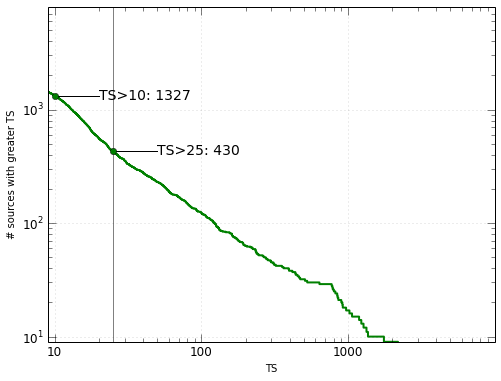

In [26]:
self.cumulative_ts(self.df.ts, check_localized=False);

In [27]:
def selname(prefix):
    names = np.asarray(self.df.index)
    return np.array([n[:4]==prefix for n in names]); 


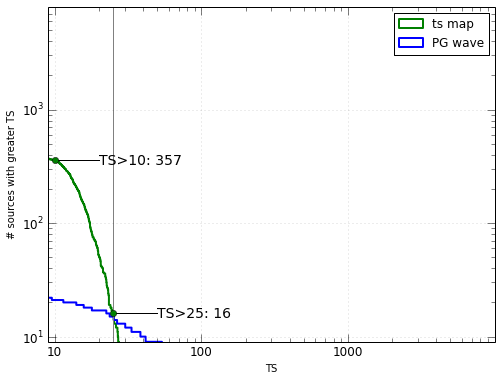

In [28]:
self.cumulative_ts(self.df.ts[selname('Sh10')], label='ts map', otherlabel='PG wave', other_ts=self.df.ts[selname('PW10')], 
                   check_localized=False);

In [6]:
def select(prefix):
    df=self.df
    names = np.asarray(df.index)
    ss = np.array([n[:4]==prefix for n in names]); 
    dfs = df[ss & (df.ts>10)]
    print 'found %d sources with prefix %s and TS>10' % ( len(dfs),prefix)
    return dfs

In [7]:
def plots(self, dfs):
    fig, axx = plt.subplots(3,2, figsize=(12,15))
    plt.subplots_adjust(hspace=0.3,left=0.05)
    ts25 = dfs.ts>25
    print 'TS>25', sum(ts25)
    ax = axx[0,0]
    ax.hist(dfs.ts.clip(10,200), np.logspace(1,np.log10(200),26))
    ax.hist(dfs.ts[ts25].clip(10,200), np.logspace(1,np.log10(200),26), color='orange',)
    plt.setp(ax, xlabel='TS', xscale='log', xlim=(10,200))
    ax.axvline(25, color='green')
    ax.grid()
    ax =axx[0,1]
    ax.hist(dfs.pivot_energy, np.logspace(2,4, 26))
    ax.hist(dfs.pivot_energy[ts25], np.logspace(2,4, 26), color='orange')
    plt.setp(ax, xlabel='pivot energy [MeV]', xscale='log')
    ax.grid()
    ax =axx[1,0]
    ax.hist(dfs.eflux.clip(0.1,10), np.logspace(-1,1, 21))
    ax.hist(dfs.eflux[ts25].clip(0.1,10),np.logspace(-1,1, 21), color='orange')
    plt.setp(ax, xlabel = 'max energy flux [eV...]', xscale='log')
    ax.grid()
    ax=axx[1,1]
    h= ax.hist(dfs.fitqual.clip(0,20), np.linspace(0,20,21))
    ax.hist(dfs.fitqual[ts25].clip(0,20), np.linspace(0,20,21), color='orange')
    plt.setp(ax, xlabel='fitqual')
    ax.grid()
    ax=axx[2,0]
    ax.hist(dfs.locqual.clip(0,8), np.linspace(0,8,26))  
    ax.hist(dfs.locqual[ts25].clip(0,8), np.linspace(0,8,26), color='orange')  
    plt.setp(ax, xlabel='locqual')
    ax.grid()
    ax=axx[2,1]
    self.skyplot(dfs.ts , ax=ax, vmin=10, vmax=50);
    

found 21 sources with prefix PW10 and TS>10
TS>25 15


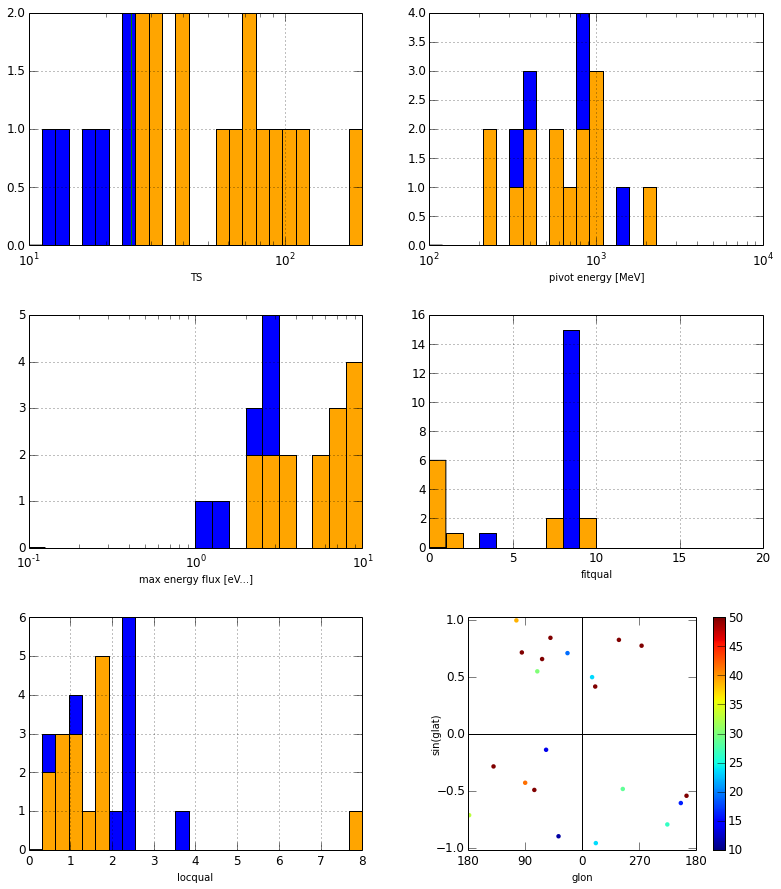

In [8]:
plots(self, select('PW10'))

found 620 sources with prefix S966 and TS>10
TS>25 191


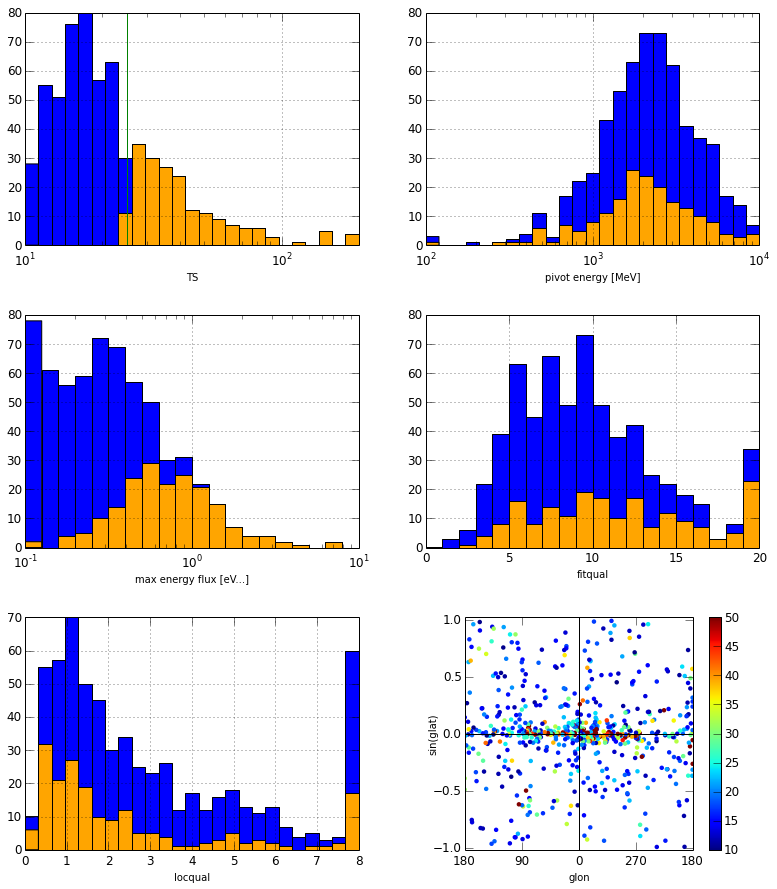

In [6]:
plots(self, select('S966'))

In [7]:
dfs.columns

NameError: name 'dfs' is not defined